In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [74]:
bankruptcy = pd.read_csv("https://raw.githubusercontent.com/christianolivamoya/MIAX11-ML/main/data/bankruptcy.csv", index_col='Company')
bankruptcy.sample(5)

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
Company,,,,,,
BellSouth,-11.5,27.6,24.4,51.4,2.266,no
Equant,8.2,-15.6,0.3,87.7,5.444,no
RSL Communications,9.1,-40.2,-0.7,81.5,0.522,yes
Exodus Communications,10.5,-12.4,-2.3,21.0,2.500,yes
NetVoice Technologies,-21.1,-46.0,-26.8,81.4,0.698,yes


In [75]:
features = bankruptcy.loc[:, bankruptcy.columns != 'Bankrupt']
target =  bankruptcy.Bankrupt


___

Se crea el objeto con el numero de componentes que nos interese. Para analizar la varianza explicada necesitamos utilizar todos los atributos disponibles.

In [76]:
pca = PCA(n_components=len(features.columns))

In [77]:
pca = pca.fit(features)

In [78]:
# Los autovectores que representan las componentes --> El peso que multiplica por el atributo para mantener
# máxima variabilidad
pd.DataFrame(pca.components_, columns=features.columns)

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL
0,-0.128789,-0.976635,-0.165546,-0.046635,-0.004195
1,-0.795211,0.045336,0.189930,0.573826,-0.015316
2,0.513391,-0.058777,-0.280471,0.808893,-0.001641
3,0.295234,-0.201678,0.926050,0.119099,0.020222
4,-0.017854,0.000579,-0.016978,0.007515,0.999668


In [79]:
pc_labels = [f'pca{i+1}' for i in range(len(features.columns))]

In [80]:
# pca.explained_variance_ratio_ guarda la información de la varianza explicada de cada autovector
var_exp = pd.Series(pca.explained_variance_ratio_, index=pc_labels)

Mostramos el porcentaje de varianza explicada por cada componente principal

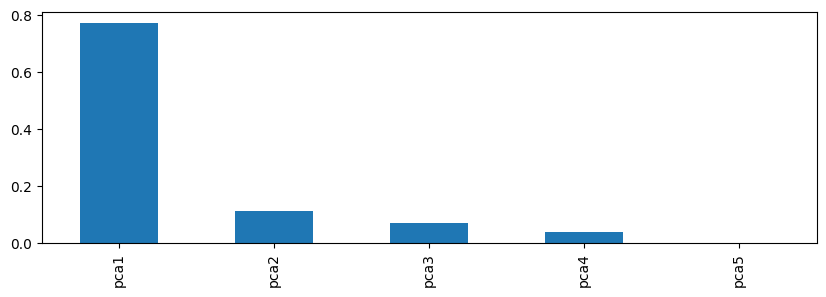

In [81]:
var_exp.plot.bar(figsize=(10, 3))
plt.show()

Si hacemos la suma acumulada `cumsum()` podemos ver el porcentaje total de varianza explicada.

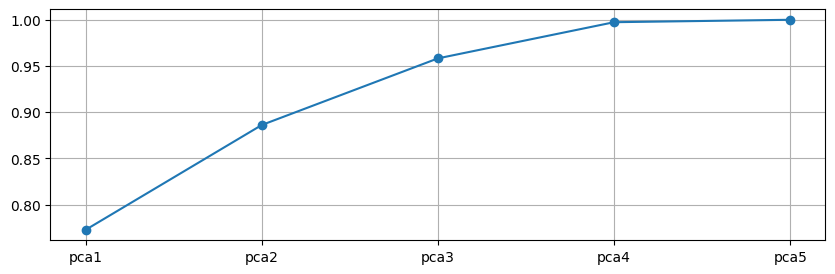

In [82]:
plt.figure(figsize=(10, 3))
plt.plot(var_exp.cumsum(), 'o-')
plt.grid()
plt.show()

Podemos ver que solamente con 2 componentes principales estamos alcanzando una varianza explicada de casi un 90%.

Al aplicar la transformación de los datos originales obtenemos una nueva representación a partir de las componentes principales.

In [83]:
feat_pca = pca.transform(features)
feat_pca_df = pd.DataFrame(feat_pca, columns=pc_labels)
feat_pca_df.head()

,pca1,pca2,pca3,pca4,pca5
0,-44.854573,-17.385834,-27.773698,-2.900858,0.280483
1,4.377977,-53.520011,-11.435258,5.623700,0.191986
2,159.446127,-2.673019,-16.554409,-22.837595,-1.831227
3,371.805198,-21.089323,12.213330,76.217334,-1.340131
4,3.584537,-11.842328,27.298125,-5.848082,-2.153240


Confirmamos que en la nueva representación las características no están correladas

In [84]:
feat_pca_df.corr().round(3)

,pca1,pca2,pca3,pca4,pca5
pca1,1.0,-0.0,0.0,-0.0,-0.0
pca2,-0.0,1.0,-0.0,-0.0,-0.0
pca3,0.0,-0.0,1.0,0.0,-0.0
pca4,-0.0,-0.0,0.0,1.0,0.0
pca5,-0.0,-0.0,-0.0,0.0,1.0


Mientras que sí que había cierta correlación en los atributos originales

In [85]:
features.corr().round(3)

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL
WC/TA,1.000,0.315,-0.004,-0.164,0.114
RE/TA,0.315,1.000,0.549,0.133,0.066
EBIT/TA,-0.004,0.549,1.000,0.084,0.071
S/TA,-0.164,0.133,0.084,1.000,-0.054
BVE/BVL,0.114,0.066,0.071,-0.054,1.000


___

### Reducción de dimensiones
En este caso seleccionamos solo 2 componentes para
hacer una representación gráfica de los datos


In [86]:
pca2 = PCA(n_components=2)

In [87]:
pca_feat = pca2.fit_transform(features)

In [88]:
pca_feat_df = pd.DataFrame(pca_feat,
                           columns=['PCA1','PCA2'],
                           index=features.index)


In [89]:
pca_feat_df.head()

,PCA1,PCA2
Company,,
360Networks,-44.854573,-17.385834
Advanced Radio Telecom,4.377977,-53.520011
Ardent Communications,159.446127,-2.673019
At Home Corp.,371.805198,-21.089323
Convergent Communications,3.584537,-11.842328


Como tenemos solamente 2 atributos, podemos representarlos en una figura en 2D:

Text(0, 0.5, 'PCA2')

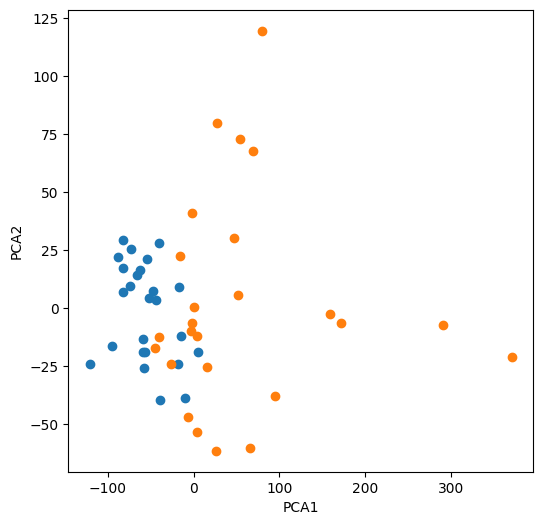

In [90]:
x_no = pca_feat_df[target == 'no']
x_yes = pca_feat_df[target == 'yes']

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x_no.PCA1, x_no.PCA2)
ax.scatter(x_yes.PCA1, x_yes.PCA2)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')



____

### Ejercicio Propuesto
Extraer las 3 primeras componentes principales para utilizarlas como características de un árbol de decisión. Comparar el resultado con una versión entrenada con las características originales

In [91]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=20)

In [93]:
pca2 = PCA(n_components=3)
pca_x_train = pca2.fit_transform(x_train)
pca_x_test = pca2.transform(x_test)

In [94]:
dTree_pca3 = DecisionTreeClassifier(max_depth=2)
_ = dTree_pca3.fit(pca_x_train, y_train)

In [95]:
score_pca3 = dTree_pca3.score(pca_x_test, y_test)
print(score_pca3)

0.9


In [96]:
dTree = DecisionTreeClassifier(max_depth=2)
_ = dTree.fit(x_train, y_train)

In [97]:
score = dTree.score(x_test, y_test)
print(score)

0.6


In [98]:
score_pca3 / score

1.5

El problema lo tenemos en la interpretabilidad del modelo:

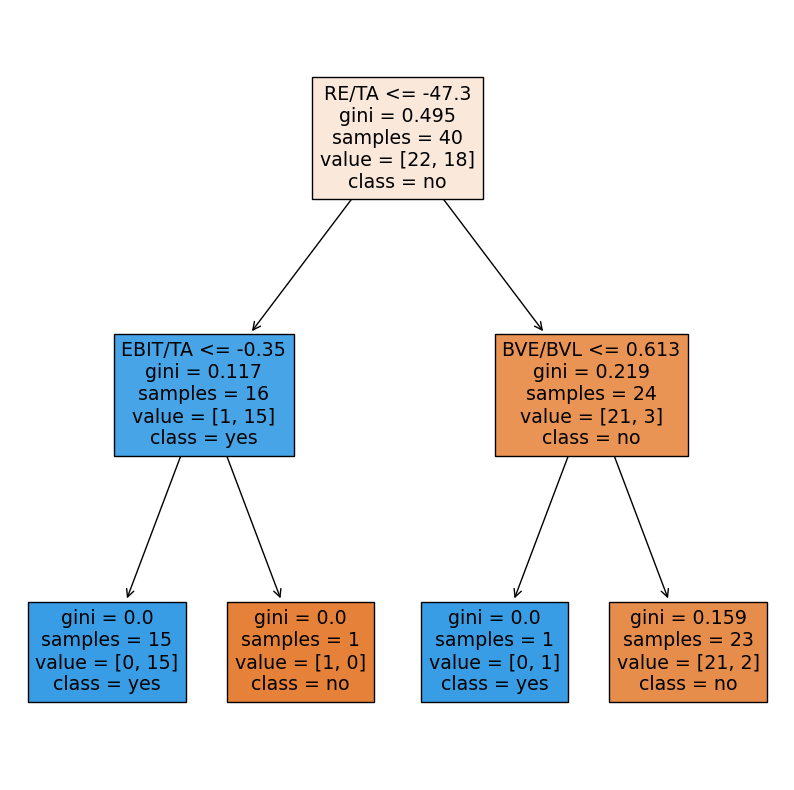

In [99]:
plt.figure(figsize=(10,10))
plot_tree(dTree,
          feature_names=features.columns,
          class_names=dTree.classes_,
          filled=True
          )
plt.show()

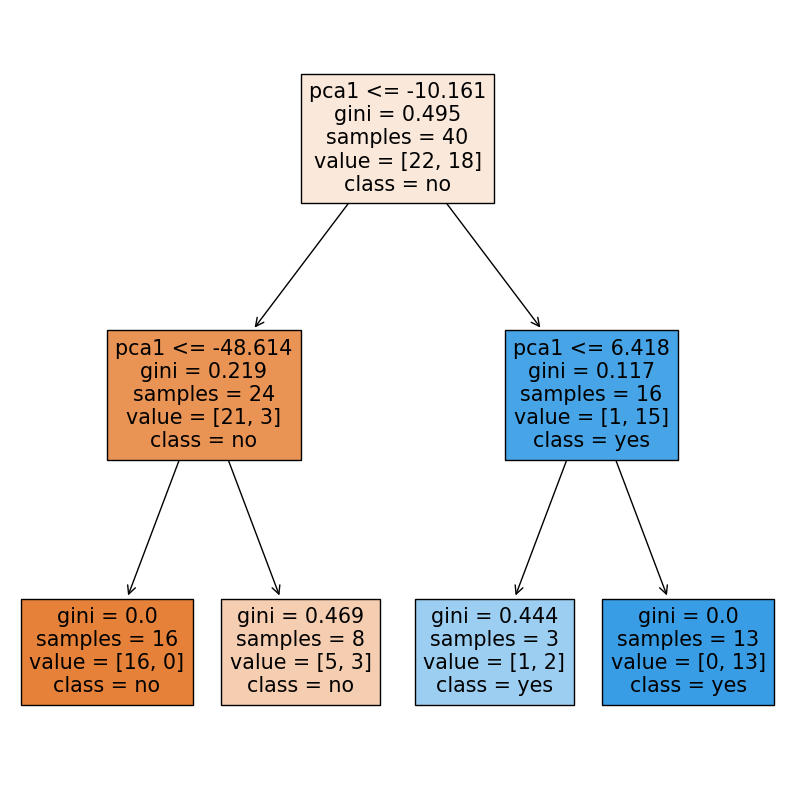

In [100]:
plt.figure(figsize=(10,10))
plot_tree(dTree_pca3,
          feature_names=['pca1', 'pca2', 'pca3'],
          class_names=dTree.classes_,
          filled=True
          )
plt.show()